In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [3]:
# Replace with the correct path
file_path = '/content/Mall_Customers (1).csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# General information
df.info()

# Descriptive statistics
df.describe()

# Check for missing values
print("Missing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


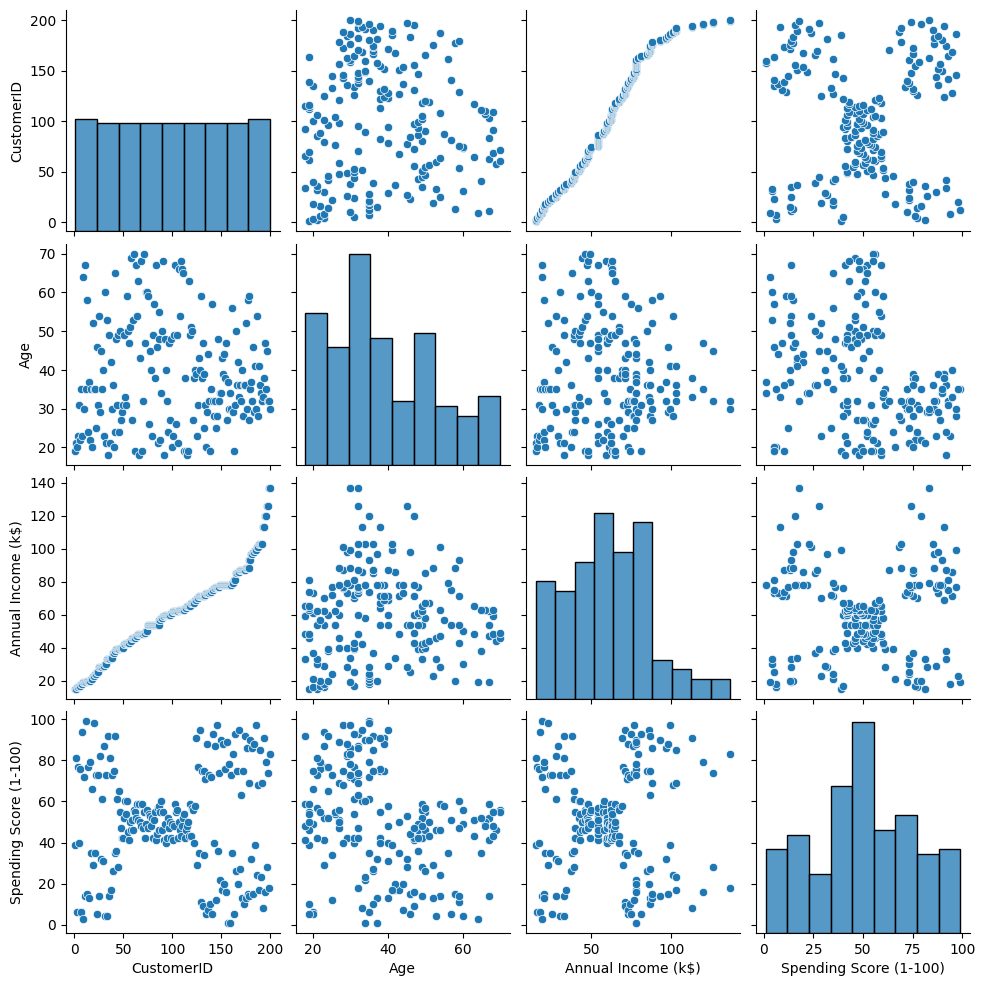

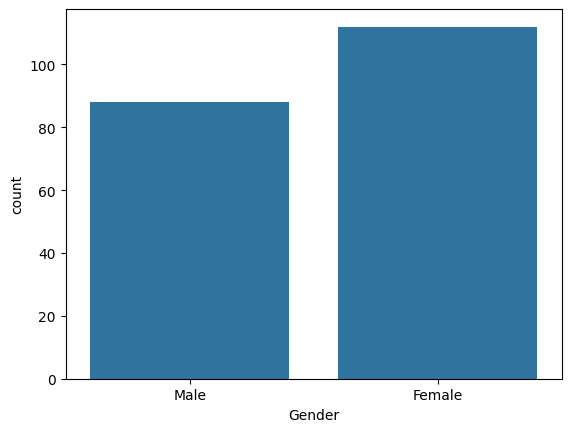

In [5]:
# Distribution of numerical features
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

# Count plot for categorical features (if applicable)
if 'Gender' in df.columns:
    sns.countplot(data=df, x='Gender')
    plt.show()


In [6]:
# Encoding categorical features
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Selecting relevant features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']  # Adjust as needed
data = df[features]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Checking the standardized data
print(pd.DataFrame(scaled_data, columns=features).head())


        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


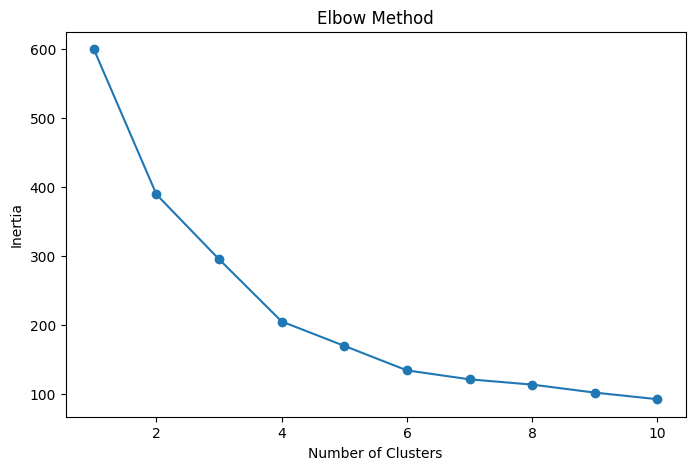

In [7]:
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [8]:
# Assuming optimal clusters = 3 (from the elbow method)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the original dataset
df['Cluster'] = clusters
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,2
3,4,1,23,16,77,2
4,5,1,31,17,40,2


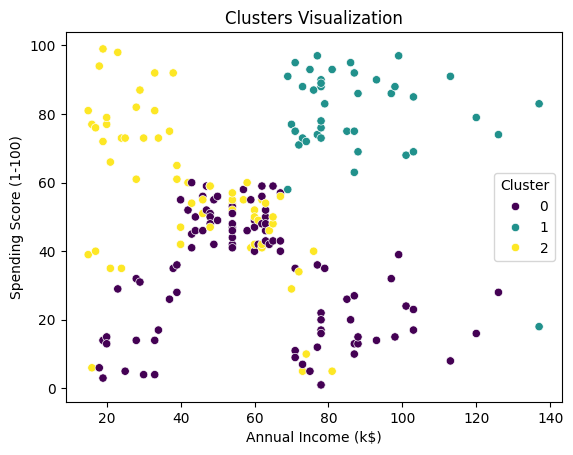

In [9]:
# 2D Visualization (choose two features)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clusters Visualization')
plt.show()


In [10]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.3579234303882264


In [11]:
# Save the dataframe with cluster labels
output_path = '/content/clustered_customers.csv'
df.to_csv(output_path, index=False)
print(f"Clustered data saved to {output_path}")


Clustered data saved to /content/clustered_customers.csv
